# Regression Multilayer Perceptron
Example from Hands-On ML

In [59]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

from sklearn.metrics import r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
print(tf.__version__)
print(keras.__version__)

2.0.0
2.2.4-tf


## Load the California housing dataset

In [3]:
housing = fetch_california_housing()


Now we create a validation and training sets, and normalizing it for Gradient Descent

In [4]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

Scale the data using the z-score

In [5]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [6]:
X_train.shape[1:]

(8,)

## Use the sequential model to build the NN

In [118]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),  # Hidden layer with 30 neurons
    # keras.layers.Dense(30, activation="relu"),  # Hidden layer with 30 neurons
    keras.layers.Dense(1), # Output Layer with a continuous value
])

In [119]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 30)                270       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [120]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)
model.compile(loss="mean_squared_error",
             optimizer=optimizer,
             metrics=[keras.metrics.MeanAbsoluteError()])

In [121]:
history = model.fit(X_train, y_train, epochs=20,
                   validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 3s 233us/sample - loss: 0.8438 - mean_absolute_error: 0.6081 - val_loss: 0.4673 - val_mean_absolute_error: 0.4987
Epoch 2/20
11610/11610 [==============================] - 2s 160us/sample - loss: 0.4790 - mean_absolute_error: 0.4916 - val_loss: 0.4304 - val_mean_absolute_error: 0.4831
Epoch 3/20
11610/11610 [==============================] - 2s 175us/sample - loss: 0.4426 - mean_absolute_error: 0.4770 - val_loss: 0.4178 - val_mean_absolute_error: 0.4770
Epoch 4/20
11610/11610 [==============================] - 2s 179us/sample - loss: 0.4264 - mean_absolute_error: 0.4668 - val_loss: 0.4231 - val_mean_absolute_error: 0.4758
Epoch 5/20
11610/11610 [==============================] - 2s 193us/sample - loss: 0.4177 - mean_absolute_error: 0.4600 - val_loss: 0.4018 - val_mean_absolute_error: 0.4610
Epoch 6/20
11610/11610 [==============================] - 2s 167us/sample - loss: 0.4070 - 

In [122]:
weights, biases = model.layers[1].get_weights()
print(weights.shape)
print(biases.shape)

(30, 1)
(1,)


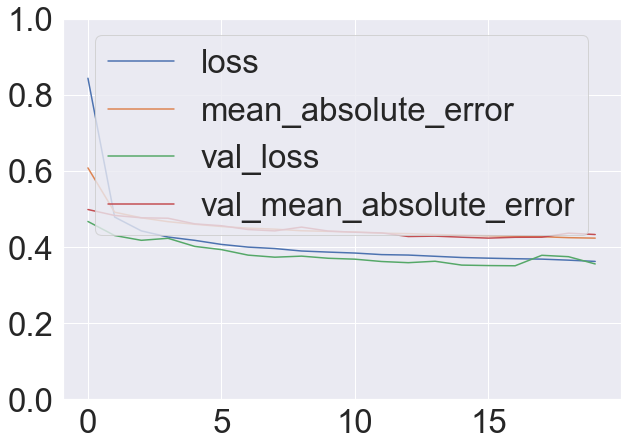

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style and fonts
sns.set_style("whitegrid")
sns.set(font_scale=3)

pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [124]:
model.evaluate(X_test, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3769957858000615, 0.44233868]

In [125]:
n_new = 10
X_new = X_test[:n_new]
y_new = y_test[:n_new]

y_pred = model.predict(X_new)

y_pred = np.reshape(y_pred, y_new.shape )

print(r2_score(y_new, y_pred))



0.5948890323851703
